In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

w[0]: 0.393906  b: -0.031804


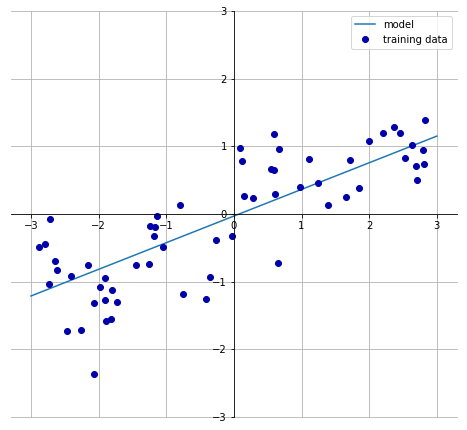

In [2]:
mglearn.plots.plot_linear_regression_wave()

# 線形回帰（通常最小二乗法）

In [5]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

lr = LinearRegression().fit(X_train,y_train)

In [7]:
print("傾きlr.coef_:{}".format(lr.coef_))
print("切片lr.intercept_:{}".format(lr.intercept_))

傾きlr.coef_:[0.39390555]
切片lr.intercept_:-0.031804343026759746


In [8]:
print("訓練セット:{:.2f}".format(lr.score(X_train,y_train)))
print("検証セット:{:.2f}".format(lr.score(X_test,y_test)))

訓練セット:0.67
検証セット:0.66


上記の例だと訓練セットと検証セットとのスコアが非常に近いため適合不足？と予想される<br>
そもそも低次元の線形回帰なので過剰適合の可能性は低い

In [10]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

print("訓練セット:{:.2f}".format(lr.score(X_train,y_train)))
print("検証セット:{:.2f}".format(lr.score(X_test,y_test)))

訓練セット:0.95
検証セット:0.61


高次元のデータセットの場合は過剰適合している。複雑度を制御できないため他のモデルを探してみる

# リッジ回帰

線形モデルのω（重み）に対して、その係数の影響をなるべく小さくすることで（0に近づける)<br>
この制約条件は正則化の一例であり、過剰適合を防ぐためにモデルに対して制約を課す。<br>
ここで用いられる正則化はL2正則化と呼ばれる

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("訓練セット:{:.2f}".format(ridge.score(X_train,y_train)))
print("検証セット:{:.2f}".format(ridge.score(X_test,y_test)))

訓練セット:0.89
検証セット:0.75


制約の強さはパラメタalphaで決める。上記の場合はデフォルトのalpha=1.0を使用している

In [20]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("alpha=10  訓練セット:{:.2f}".format(ridge10.score(X_train,y_train)))
print("alpha=10  検証セット:{:.2f}".format(ridge10.score(X_test,y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("alpha=0.1 訓練セット:{:.2f}".format(ridge01.score(X_train,y_train)))
print("alpha=0.1 検証セット:{:.2f}".format(ridge01.score(X_test,y_test)))

alpha=10  訓練セット:0.79
alpha=10  検証セット:0.64
alpha=0.1 訓練セット:0.93
alpha=0.1 検証セット:0.77


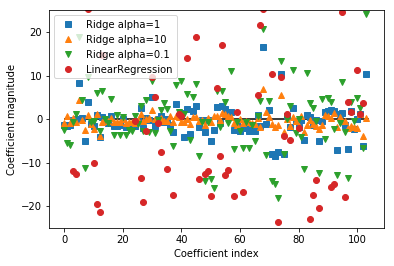

In [21]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

横軸は特徴量の数<br>
上記からalphaを大きくすればするほど制約が強くなり、重みωは0に近づく<br>
線形モデルの場合はalpha=0に相当するので重みωは大きくなる

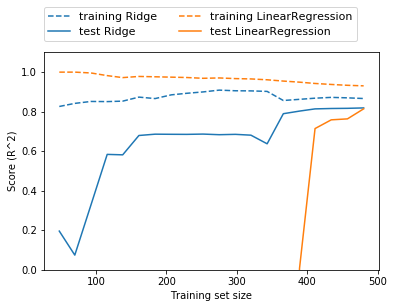

In [22]:
mglearn.plots.plot_ridge_n_samples()

訓練データが小さい場合でもリッジ回帰はある程度は適合できているが線形回帰は全くできていない<br>
訓練データが大きくなる場合はリッジ回帰と線形回帰に精度はほぼ同等となる<br>
つまり訓練データが多いとリッジ回帰の正則化はあまり有効でなくなる

# Lasso回帰

LassoもRidgeと同じく正則化を行う。<br>
こちらの正則化はL1正則化と呼ばれ、Ridgeと制約のかけ方が違う<br>
Lassoにおいてはいくつかの重みω（係数）が0となる。つまりこのモデルにおいていくつかの特徴量が完全に無視されることとなる<br>
考慮する特徴量が減るのでモデルへの理解が少ししやすい

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("訓練セット:{:.2f}".format(lasso.score(X_train,y_train)))
print("検証セット:{:.2f}".format(lasso.score(X_test,y_test)))
print("使用された特徴量の数:{}".format(np.sum(lasso.coef_ != 0)))

訓練セット:0.29
検証セット:0.21
使用された特徴量の数:4


全く適合できてない。これはLassoのパラメタalpha=1.0(デフォルト）となっているためである

In [25]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("訓練セット:{:.2f}".format(lasso001.score(X_train,y_train)))
print("検証セット:{:.2f}".format(lasso001.score(X_test,y_test)))
print("使用された特徴量の数:{}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("訓練セット:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("検証セット:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("使用された特徴量の数:{}".format(np.sum(lasso00001.coef_ != 0)))

訓練セット:0.90
検証セット:0.77
使用された特徴量の数:33
訓練セット:0.95
検証セット:0.64
使用された特徴量の数:94


alphaを小さくしすぎるとリッジ回帰のときと同様に正則化の効果が薄れて過剰適合する

(-25, 25)

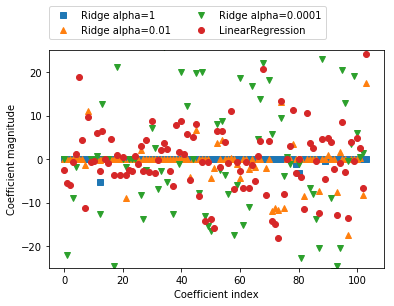

In [28]:
plt.plot(lasso.coef_,'s',label="Ridge alpha=1")
plt.plot(lasso001.coef_,'^',label="Ridge alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Ridge alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="LinearRegression")
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)


alpha=1とした場合は正則化が強すぎてほとんどの特徴量の係数が0となっていることがわかる

実用の際はリッジ回帰をまず試してみる<br>
特徴量がたくさんあり、重要なものがわずかしかないと予測される、もしくは解釈しやすいモデルが必要な場合はlasso<br>
ただしridgeとlassoを組み合わせたElasticNetクラスがあるので実際はこれが最良の結果となることが多い。<br>
ElasticNetではL1正則化、L2正則化それぞれのパラメタを調整するコストがかかる